In [1]:
#Specify the data to plot here.
model_name = "removal"  #Name of the model
target = "phosphorylated_CheY"    #Target molecule
vals = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5]  #Gradients of interest

In [2]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

In [3]:
def load_data(val):
    file_path = os.path.join(model_name + ".gdat")
    with open(file_path) as f:
        first_line = f.readline() #Read the first line
    cols = first_line.split()[1:] #Get the col names (species names)

    ind = 0
    while cols[ind] != target:
        ind += 1                  #Get col number of target molecule

    data = np.loadtxt(file_path)  #Load the file
    time = data[:, 0]             #Time points
    concentration = data[:, ind]  #Concentrations

    return time, concentration

In [4]:
def plot(val, time, concentration, ax, i):
    legend = "k = " + str(val)
    ax.plot(time, concentration, label = legend)
    ax.legend()

    return

C:\Users\Lauri\AppData\Local\Temp\ipykernel_14648\770019865.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, which = 'minor', axis = 'both', color = 'lightgrey', linewidth = 0.5, linestyle = ':')
C:\Users\Lauri\AppData\Local\Temp\ipykernel_14648\770019865.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, which = 'major', axis = 'both', color = 'grey', linewidth = 0.8 , linestyle = ':')


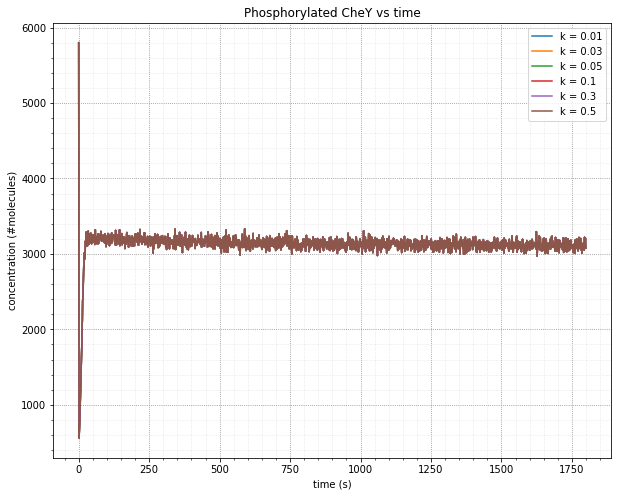

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
for i in range(len(vals)):
    val = vals[i]
    time, concentration = load_data(val)
    plot(val, time, concentration, ax, i)

plt.xlabel("time (s)")
plt.ylabel("concentration (#molecules)")
plt.title("Phosphorylated CheY vs time")
ax.minorticks_on()
ax.grid(b = True, which = 'minor', axis = 'both', color = 'lightgrey', linewidth = 0.5, linestyle = ':')
ax.grid(b = True, which = 'major', axis = 'both', color = 'grey', linewidth = 0.8 , linestyle = ':')

plt.show()